In [18]:
import os
import glob
from Bio import SeqIO
from tqdm.auto import tqdm
import pylev
import matplotlib.pyplot as plt
import numpy as np

## Load all the unique sequences
These are the results for searching a database for homologues of:
- thioamide
- macroamidine
- azoline

In [82]:
seqdump_dirs = glob.glob("../**/**seqdump.fa",recursive = True)

unique_sequence_ids = []
unique_sequences = []
num_sequences = 0
seqrecs_list = []
for seqdump_dir in seqdump_dirs:
    seqrecs = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")]
    print(f"{seqdump_dir} has {len(seqrecs)} sequences")
    seqrecs_list.append(seqrecs)
    
for i in tqdm(range(len(seqdump_dirs)), desc='Loading all sequences'):
    seqrecs = seqrecs_list[i]
    seqdump_dir = seqdump_dirs[i]
    #seqrecs = [seqrec for seqrec in SeqIO.parse(seqdump_dir,"fasta")]
    #print(f"{seqdump_dir} has {len(seqrecs)} sequences")
    YcaO_type = seqdump_dir.split("/")[-3]
    YcaO_subclass = seqdump_dir.split("/")[-2]
    #print(YcaO_type,YcaO_subclass)
    for seqrec in seqrecs[:15]:
        num_sequences += 1
        if seqrec.id not in unique_sequence_ids:
            unique_sequence_ids.append(seqrec.id)
            seqrec.id = f"{YcaO_type}_{YcaO_subclass}_{seq_rec.id}"
            unique_sequences.append(seqrec)
            

# '''OVERWRITING UNIQUE SEQUENCES FOR SPEED OF PROCESSING'''
# unique_sequences = [seqrec for seqrec in SeqIO.parse("../raw_sequences/Azoline/Mccb17/HMMER_seqdump.fa","fasta")]     
print(f'From {num_sequences} searched sequences {len(unique_sequences)} are unique. Loaded in unique_sequences variable.')

../raw_sequences/Amidine/Lasso_peptides/HMMER_seqdump.fa has 1665 sequences
../raw_sequences/Amidine/Jesko_but_unknown/HMMER_seqdump.fa has 14 sequences
../raw_sequences/Amidine/Bottromycin/HMMER_seqdump.fa has 273 sequences
../raw_sequences/Azoline/Goadsporin/HMMER_seqdump.fa has 1750 sequences
../raw_sequences/Azoline/Thiopeptide_Lactazole/HMMER_seqdump.fa has 1595 sequences
../raw_sequences/Azoline/Thiostrepton/HMMER_seqdump.fa has 1205 sequences
../raw_sequences/Azoline/Sag/HMMER_seqdump.fa has 576 sequences
../raw_sequences/Azoline/Mccb17/HMMER_seqdump.fa has 13 sequences
../raw_sequences/Azoline/PZN/HMMER_seqdump.fa has 211 sequences
../raw_sequences/Azoline/Cyanobactins/PatD_HMMER_seqdump.fa has 1854 sequences
../raw_sequences/Azoline/Cyanobactins/TruD_HMMER_seqdump.fa has 1858 sequences
../raw_sequences/Azoline/Bottromycin/HMMER_seqdump.fa has 5 sequences
../raw_sequences/Azoline/Muscoride/HMMER_seqdump.fa has 1821 sequences
../raw_sequences/Azoline/Heterocycloanthracins/HMMER_

Loading all sequences: 100%|██████████| 19/19 [00:00<00:00, 14104.74it/s]

From 272 searched sequences 202 are unique. Loaded in unique_sequences variable.


## Remove sequences that are too short to be considered YcaO or too long to be useful
# <center> A.K.A len > 700 or len < 350 </center>

In [83]:
filtered_sequences = []

for seq_rec in unique_sequences:
    if(len(seq_rec.seq)<700 and len(seq_rec.seq)>350):
        filtered_sequences.append(seq_rec)

print(f'From {len(unique_sequences)} unique sequences. {len(filtered_sequences)} remain after processing')

From 202 unique sequences. 146 remain after processing


## Save unique sequences to file for intermediate bash processing

In [84]:
file_dir = './../processed_sequences/'
unique_seq_fp = os.path.join(file_dir, "unique_unaligned_sequences.txt")
SeqIO.write(filtered_sequences, unique_seq_fp, "fasta")

146

## Remove Sequences with High Similarity using CD-HIT eg. 90% or 70% identity etc

In [85]:
identity_percentage = 0.9
filtered_by_identity_unique_seq_fp = os.path.join(file_dir, f"unique_filtered_{identity_percentage}_sequences.txt")

!./../external_scripts/cd-hit-v4.8.1-2019-0228/cd-hit -i $unique_seq_fp -o $filtered_by_identity_unique_seq_fp -c $identity_percentage -n 3 -d 0 -T 8 -M 16000

num_sequences = len([seq.id for seq in SeqIO.parse(filtered_by_identity_unique_seq_fp,"fasta")])
print(f"Started with {len(filtered_sequences)} sequences, after removing those with >{identity_percentage*100}% identity, we have {num_sequences} sequences!")

Program: CD-HIT, V4.8.1 (+OpenMP), Dec 13 2022, 11:04:39
Command: ./../external_scripts/cd-hit-v4.8.1-2019-0228/cd-hit
         -i
         ./../processed_sequences/unique_unaligned_sequences.txt
         -o
         ./../processed_sequences/unique_filtered_0.9_sequences.txt
         -c 0.9 -n 3 -d 0 -T 8 -M 16000

Started: Tue Dec 13 16:29:16 2022
                            Output                              
----------------------------------------------------------------
Your word length is 3, using 5 may be faster!
total seq: 146
longest and shortest : 681 and 352
Total letters: 74482
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 8 X 10M = 85M
Table           : 2 X 0M = 0M
Miscellaneous   : 0M
Total           : 85M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 1989313607

# comparing sequences from          0  to        146
---------- new table wit

## Compute aligned sequences using mafft

In [86]:
aligned_unique_seq_fp = os.path.join(file_dir, f"aligned_{identity_percentage}_identity_sequences.txt")

!mafft --auto --distout $filtered_by_identity_unique_seq_fp > $aligned_unique_seq_fp 

outputhat23=2
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.475
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=2
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
  130 / 140
done.

Progressive alignment ... 
STEP    39 /139 
Reallocating..done. *alloclen = 2366
STEP   139 /139 
done.
tbfast (aa) Version 7.475
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 2
sueff_global = 0.100000
nadd = 2
Loading 'hat3' ... done.
rescale = 1

  130 / 140
Segment   1/  1    1-1411
done 002-001-1  identical.    accepted. accepted. identical.    rejected. identical.    rejected. accepted. identical.    identical.    accepted. accepted.

In [87]:
aligned_sequences = [seqrec for seqrec in SeqIO.parse(aligned_unique_seq_fp,"fasta")]
print(f"Aligned sequences have a length of {len(aligned_sequences[0].seq)} AAs")

Aligned sequences have a length of 1457 AAs


## Run Iq-Tree!

Best Model for 5sequences from each HMMER file was WAG+F+R5, (after filtering for long & short sequences it was Q.pfam+F+R4)

In [88]:
!iqtree2 -s $aligned_unique_seq_fp -redo -T 48 -m Q.pfam+F+R4 -B 1000 

IQ-TREE multicore version 2.2.0 COVID-edition for Linux 64-bit built Jun  1 2022
Developed by Bui Quang Minh, James Barbetti, Nguyen Lam Tung,
Olga Chernomor, Heiko Schmidt, Dominik Schrempf, Michael Woodhams, Ly Trong Nhan.

Host:    dc4b1604e884 (AVX2, FMA3, 251 GB RAM)
Command: iqtree2 -s ./../processed_sequences/aligned_0.9_identity_sequences.txt -redo -T 48 -m Q.pfam+F+R4 -B 1000
Seed:    780841 (Using SPRNG - Scalable Parallel Random Number Generator)
Time:    Tue Dec 13 16:30:11 2022
Kernel:  AVX+FMA - 48 threads (48 CPU cores detected)

Reading alignment file ./../processed_sequences/aligned_0.9_identity_sequences.txt ... Fasta format detected
Reading fasta file: done in 0.0051735 secs using 82.21% CPU
NOTE: Change sequence name 'Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN A0A4Q7KGJ6_9PSEU' -> Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A4Q7KGJ6_9PSEU
NOTE: Change sequence name 'Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN A0A3N4US38_9ACTN' 

Alignment has 140 sequences with 1457 columns, 1314 distinct patterns
957 parsimony-informative, 206 singleton sites, 294 constant sites
                                                                                     Gap/Ambiguity  Composition  p-value
Analyzing sequences: done in 0.00928617 secs using 4434% CPU
   1  Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A4Q7KGJ6_9PSEU              58.20%    failed      0.00%
   2  Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A3N4US38_9ACTN              58.06%    failed      0.00%
   3  Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A1Q4V897_9ACTN              57.10%    failed      0.00%
   4  Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A0W7X898_9ACTN              57.72%    failed      0.00%
   5  Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A498E1X8_9ACTN              58.06%    failed      0.00%
   6  Amidine_Lasso_peptides_Thioamide_Jesko_A0A7K1KSY3_9ACTN_A0A2P8Q2Z0_9ACTN   

Checking for duplicate sequences: done in 0.0089559 secs using 4490% CPU

Create initial parsimony tree by phylogenetic likelihood library (PLL)... 0.136 seconds
Generating 1000 samples for ultrafast bootstrap (seed: 780841)...

NOTE: 120 MB RAM (0 GB) is required!
Estimate model parameters (epsilon = 0.100)
1. Initial log-likelihood: -114653.225
2. Current log-likelihood: -107995.702
3. Current log-likelihood: -107916.864
4. Current log-likelihood: -107914.802
5. Current log-likelihood: -107914.479
Optimal log-likelihood: -107914.370
Site proportion and rates:  (0.043,0.106) (0.198,0.412) (0.358,0.820) (0.400,1.549)
Parameters optimization took 5 rounds (1.785 sec)
Wrote distance file to... 
Computing ML distances based on estimated model parameters...
Calculating distance matrix: done in 0.0991559 secs using 4749% CPU
Computing ML distances took 0.099455 sec (of wall-clock time) 4.724949 sec (of CPU time)
Setting up auxiliary I and S matrices: done in 0.00525071 secs
Constructing Rap

Optimizing NNI: done in 2.04367 secs using 4773% CPU
Optimizing NNI: done in 1.59391 secs using 4785% CPU
Optimizing NNI: done in 1.48421 secs using 4785% CPU
Iteration 90 / LogL: -107718.118 / Time: 0h:3m:13s (0h:2m:23s left)
Optimizing NNI: done in 1.76933 secs using 4785% CPU
Optimizing NNI: done in 1.79011 secs using 4784% CPU
Optimizing NNI: done in 1.96018 secs using 4784% CPU
Optimizing NNI: done in 1.48233 secs using 4784% CPU
Optimizing NNI: done in 1.93499 secs using 4784% CPU
Optimizing NNI: done in 1.93034 secs using 4785% CPU
Optimizing NNI: done in 1.58458 secs using 4783% CPU
Optimizing NNI: done in 1.92728 secs using 4784% CPU
Optimizing NNI: done in 1.79687 secs using 4785% CPU
Optimizing NNI: done in 1.82265 secs using 4786% CPU
Iteration 100 / LogL: -107719.512 / Time: 0h:3m:31s (0h:1m:59s left)
Log-likelihood cutoff on original alignment: -107785.572
NOTE: Bootstrap correlation coefficient of split occurrence frequencies: 0.983
NOTE: UFBoot does not converge, contin

Reading input file ./../processed_sequences/aligned_0.9_identity_sequences.txt.splits.nex...
140 taxa and 596 splits.
Consensus tree written to ./../processed_sequences/aligned_0.9_identity_sequences.txt.contree
Reading input trees file ./../processed_sequences/aligned_0.9_identity_sequences.txt.contree
Log-likelihood of consensus tree: -107716.292

Analysis results written to: 
  IQ-TREE report:                ./../processed_sequences/aligned_0.9_identity_sequences.txt.iqtree
  Maximum-likelihood tree:       ./../processed_sequences/aligned_0.9_identity_sequences.txt.treefile
  Likelihood distances:          ./../processed_sequences/aligned_0.9_identity_sequences.txt.mldist

Ultrafast bootstrap approximation results written to:
  Split support values:          ./../processed_sequences/aligned_0.9_identity_sequences.txt.splits.nex
  Consensus tree:                ./../processed_sequences/aligned_0.9_identity_sequences.txt.contree
  Screen log file:               ./../processed_sequence

## Find redundant sequences to save compute

In [68]:
def pairwise_sequence_identity(seq_rec_1, seq_rec_2):
    seq_1 = str(seq_rec_1.seq)
    seq_2 = str(seq_rec_2.seq)
    
    num_matching = 0
    length = 0
    for i in range(len(seq_1)):
        if seq_1[i] == '-' and seq_2[i] == '-':
            continue
        if seq_1[i] == seq_2[i]:
            num_matching += 1
        length += 1
    return num_matching/length
seq_1, seq_2 = aligned_sequences[:2]
print(f'Sequence identity test between\nseq 1: {str(seq_1.seq)[:200]}...\nand\nseq 2: {str(seq_2.seq)[:200]}...')
identity_similarity = pairwise_sequence_identity(seq_1, seq_2)
print(f'Identity similarity = {identity_similarity}')

Sequence identity test between
seq 1: --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------...
and
seq 2: --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------...
Identity similarity = 0.9601769911504425


In [69]:
redundant_sequences = set()
threshold = 0.7 # anything above 70% identity to the current seq will be filtered out

pbar = tqdm(enumerate(aligned_sequences), desc='Filtering sequences', total=len(aligned_sequences))
for i, sequence in pbar:
    if i in redundant_sequences:
        continue
    comparison_sequences = [(seq, j) for j, seq in enumerate(aligned_sequences) if j != i and j not in redundant_sequences]
    for comp_seq, comp_seq_idx in comparison_sequences:
        identity_similarity = pairwise_sequence_identity(sequence, comp_seq)
        if identity_similarity > threshold: # if above threshold, then flag as redundant
            redundant_sequences.add(comp_seq_idx)
            pbar.set_description(f'Filtering sequences, found {len(redundant_sequences)} redundant')
#             print(f'Found {i} has redundant sequence with {identity_similarity*100:.2f}% similarity.')
#             print(f'We have {len(redundant_sequences)} redundant sequences.')

Filtering sequences, found 32 redundant:   0%|          | 36/19457 [06:08<55:11:27, 10.23s/it]


KeyboardInterrupt: 

In [57]:
filtered_sequences = [seq for i, seq in enumerate(aligned_sequences) if i not in redundant_sequences]

100%|██████████| 45/45 [00:00<00:00, 132.32it/s]


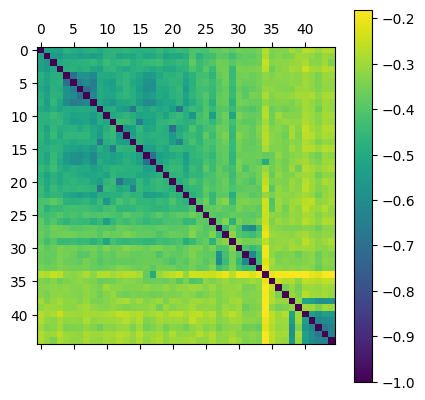

In [62]:
similarity_matrix = []

for i in tqdm(range(len(filtered_sequences))):
    row = []
    for j in range(len(filtered_sequences)):
        similarity = pairwise_sequence_identity(filtered_sequences[i], filtered_sequences[j])
        row.append(similarity)
    similarity_matrix.append(row)

m = np.array(similarity_matrix)
plt.matshow(-m)
plt.colorbar()

In [54]:
redundant_sequences

{1,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 17,
 18,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 39,
 41,
 42,
 44,
 48,
 49,
 50,
 51,
 52,
 55,
 56,
 57,
 58,
 62,
 63,
 64,
 65,
 67,
 70,
 72,
 81,
 85,
 91,
 92,
 96,
 97,
 98}

In [30]:
len(aligned_sequences)

999